<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_11_Random__Forest_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [8]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [10]:
fraud.shape

(600, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


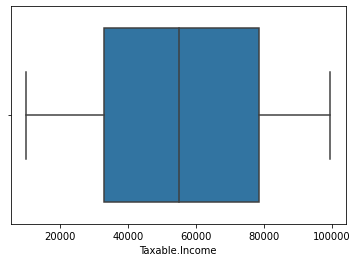

In [11]:
sns.boxplot(fraud['Taxable.Income'])

there are no outliers

In [12]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


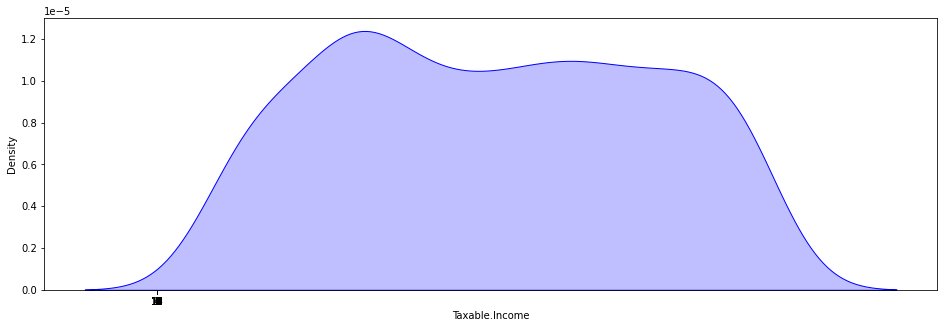

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(fraud['Taxable.Income'].skew()))
print("Kurtosis: {}".format(fraud['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(fraud['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skewed on the right

The data has negative Kurtosis

In [14]:
#Complete fraudfraudset
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [15]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0


In [16]:
fraud=fraud.rename(columns={'Marital.Status': 'Marital_Status', 'Taxable.Income':'Taxable_Income', 
                          'City.Population':'City_Population', 'Work.Experience':'Work_Experience'})
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0


In [17]:
fraud.loc[fraud["Taxable_Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable_Income"]<=30000,"income"]="Risky"
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income
0,0,Single,68833,50047,10,1,Good
1,1,Divorced,33700,134075,18,1,Good
2,0,Married,36925,160205,30,1,Good
3,1,Single,50190,193264,15,1,Good
4,0,Married,81002,27533,28,0,Good


In [18]:
fraud = pd.get_dummies(fraud, columns=['Marital_Status'])
fraud.head()

,Undergrad,Taxable_Income,City_Population,Work_Experience,Urban,income,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,68833,50047,10,1,Good,0,0,1
1,1,33700,134075,18,1,Good,1,0,0
2,0,36925,160205,30,1,Good,0,1,0
3,1,50190,193264,15,1,Good,0,0,1
4,0,81002,27533,28,0,Good,0,1,0


In [19]:
fraud = fraud[['Taxable_Income','City_Population','Work_Experience','Undergrad',
                           'Urban','Marital_Status_Divorced','Marital_Status_Married',
                           'Marital_Status_Single','income']]
fraud.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,income
0,68833,50047,10,0,1,0,0,1,Good
1,33700,134075,18,1,1,1,0,0,Good
2,36925,160205,30,0,1,0,1,0,Good
3,50190,193264,15,1,1,0,0,1,Good
4,81002,27533,28,0,0,0,1,0,Good


In [20]:
corr = fraud.corr()
corr

,Taxable_Income,City_Population,Work_Experience,Undergrad,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
Taxable_Income,1.000000,-0.064387,-0.001818,-0.049232,0.070628,0.062099,-0.100611,0.037910
City_Population,-0.064387,1.000000,0.013135,0.079579,-0.040098,0.004925,-0.007035,0.002087
Work_Experience,-0.001818,0.013135,1.000000,-0.005362,-0.094559,-0.014833,0.033347,-0.018123
Undergrad,-0.049232,0.079579,-0.005362,1.000000,-0.000267,-0.045101,0.015120,0.028883
Urban,0.070628,-0.040098,-0.094559,-0.000267,1.000000,-0.065518,0.016771,0.047014
Marital_Status_Divorced,0.062099,0.004925,-0.014833,-0.045101,-0.065518,1.000000,-0.468757,-0.510435
Marital_Status_Married,-0.100611,-0.007035,0.033347,0.015120,0.016771,-0.468757,1.000000,-0.520317
Marital_Status_Single,0.037910,0.002087,-0.018123,0.028883,0.047014,-0.510435,-0.520317,1.000000


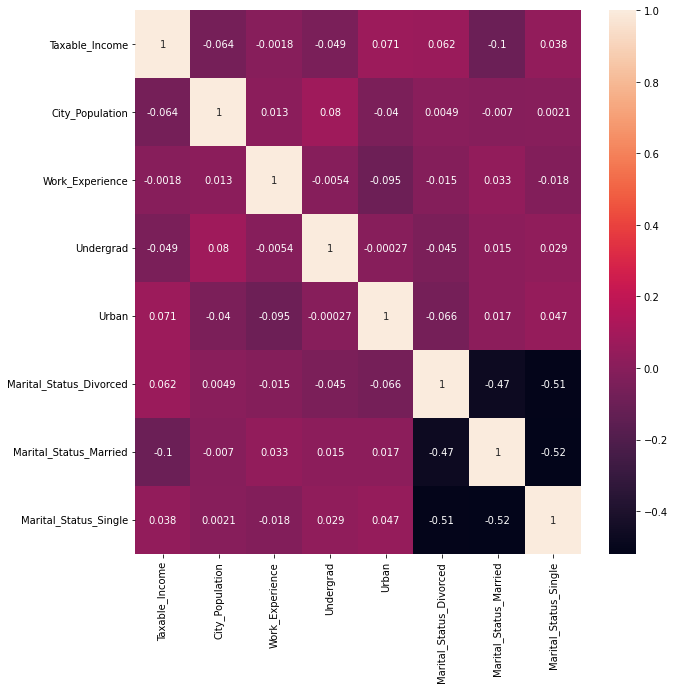

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [39]:
x=fraud.iloc[:,1:8]
y=fraud['income']

In [40]:
x.head()

,City_Population,Work_Experience,Undergrad,Urban,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,50047,10,0,1,0,0,1
1,134075,18,1,1,1,0,0
2,160205,30,0,1,0,1,0
3,193264,15,1,1,0,0,1
4,27533,28,0,0,0,1,0


In [41]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: income, dtype: object

In [42]:
fraud.income.value_counts()

Good     476
Risky    124
Name: income, dtype: int64

In [43]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=20, max_features=3)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7350000000000001


In [44]:
model.fit(x,y)
fraud['pred'] = model.predict(x)
cols = ['pred','income']
fraud[cols].head()

,pred,income
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(fraud["income"],model.predict(x)) # Confusion matrix


array([[476,   0],
       [  5, 119]])

In [46]:
pd.crosstab(fraud["income"],fraud["pred"])

pred,Good,Risky
income,,
Good,476,0
Risky,5,119


In [47]:
print("Accuracy = ",(476+124)/(476+124)*100)

Accuracy =  100.0


In [48]:
# Accuracy 
np.mean(fraud['pred']==y)

0.9916666666666667

In [49]:
model.feature_importances_

array([0.52869682, 0.31408135, 0.04127524, 0.05246935, 0.01900061,
       0.02234051, 0.02213613])

In [50]:
fi = pd.DataFrame({'feature': list(x.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [51]:
fi

,feature,importance
0,City_Population,0.528697
1,Work_Experience,0.314081
3,Urban,0.052469
2,Undergrad,0.041275
5,Marital_Status_Married,0.022341
6,Marital_Status_Single,0.022136
4,Marital_Status_Divorced,0.019001


As seen in the above table city population is most important feature